In [4]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import requests
from datetime import datetime
from citipy import citipy

In [5]:
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fae543a187910989cb0078c9c9ab572c


In [6]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [7]:
coordinates = list(lat_lngs)

In [8]:
# Use the tuple function to display the latitude and longitude combinatio
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0],coordinate[1]).country_code)


tuktoyaktuk ca
constitucion mx
albany au
saint george bm
vanimo pg
umzimvubu za
ushuaia ar
olafsvik is
gedo et
atuona pf
bima id
severomuysk ru
cidreira br
hermanus za
salalah om
san patricio mx
carnarvon au
rikitea pf
port alfred za
taolanaro mg
nikolskoye ru
butaritari ki
port alfred za
klaksvik fo
thompson ca
burgos es
longyearbyen sj
kurilsk ru
guerrero negro mx
mar del plata ar
vao nc
kahului us
barentsburg sj
bireun id
aquiraz br
lolua tv
torbay ca
tura ru
lompoc us
lazaro cardenas mx
cape town za
mataura pf
ilulissat gl
bredasdorp za
longyearbyen sj
vardo no
hobart au
mahebourg mu
puerto ayora ec
tazovskiy ru
punta arenas cl
taolanaro mg
kaitangata nz
barrow us
brae gb
hilo us
illoqqortoormiut gl
georgetown sh
taburi ph
clyde river ca
atuona pf
comendador do
rikitea pf
punta arenas cl
severo-kurilsk ru
taolanaro mg
malbork pl
upernavik gl
carnarvon au
hobart au
busselton au
thompson ca
barentsburg sj
arona es
punta arenas cl
mataura pf
lompoc us
bethel us
sofiysk ru
qaanaaq gl
q

jamestown sh
port lincoln au
vila do maio cv
rikitea pf
mataura pf
lebu cl
tabou ci
karratha au
mayo ca
amderma ru
vardo no
eirunepe br
saskylakh ru
teahupoo pf
atuona pf
port elizabeth za
guerrero negro mx
kieta pg
batouri cm
college us
alice springs au
ancud cl
pijijiapan mx
khatanga ru
chokurdakh ru
rikitea pf
tunduru tz
fitionesti ro
yulara au
mahebourg mu
bethel us
butaritari ki
new norfolk au
iralaya hn
mahebourg mu
albany au
avarua ck
albany au
punta arenas cl
arraial do cabo br
saint-philippe re
jaltocan mx
ostrovnoy ru
poddorye ru
bethel us
cockburn town tc
santa maria cv
umm durman sd
severo-kurilsk ru
hobart au
busselton au
ushuaia ar
skeldon gy
brownwood us
carnarvon au
leningradskiy ru
bengkulu id
carnarvon au
yar-sale ru
dingle ie
riberalta bo
punta arenas cl
busselton au
cidreira br
henties bay na
atuona pf
ambon id
hobart au
ushuaia ar
bluff nz
barentsburg sj
victoria sc
ridgecrest us
ushuaia ar
manitouwadge ca
east london za
avera pf
tiksi ru
rikitea pf
busselton au
ja

In [9]:
# 
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

581

In [10]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval       ")
print("-------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i%50 == 0 and i > 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | constitucion
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | vanimo
Processing Record 6 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | olafsvik
Processing Record 9 of Set 1 | gedo
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | bima
Processing Record 12 of Set 1 | severomuysk
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | nikolskoye
Processing Record 2

Processing Record 34 of Set 3 | attawapiskat
City not found. Skipping...
Processing Record 35 of Set 3 | karamay
City not found. Skipping...
Processing Record 36 of Set 3 | sentyabrskiy
City not found. Skipping...
Processing Record 37 of Set 3 | mecca
Processing Record 38 of Set 3 | east london
Processing Record 39 of Set 3 | gambo
Processing Record 40 of Set 3 | tucuman
Processing Record 41 of Set 3 | bilma
Processing Record 42 of Set 3 | coswig
Processing Record 43 of Set 3 | haines junction
Processing Record 44 of Set 3 | pochutla
Processing Record 45 of Set 3 | dawei
Processing Record 46 of Set 3 | hithadhoo
Processing Record 47 of Set 3 | pisco
Processing Record 48 of Set 3 | bayonet point
Processing Record 49 of Set 3 | provideniya
Processing Record 50 of Set 3 | tivaouane
Processing Record 1 of Set 4 | vanavara
Processing Record 2 of Set 4 | miraflores
Processing Record 3 of Set 4 | kayes
Processing Record 4 of Set 4 | cairns
Processing Record 5 of Set 4 | launceston
Processing 

Processing Record 24 of Set 7 | poddorye
Processing Record 25 of Set 7 | santa maria
Processing Record 26 of Set 7 | umm durman
City not found. Skipping...
Processing Record 27 of Set 7 | skeldon
Processing Record 28 of Set 7 | brownwood
Processing Record 29 of Set 7 | bengkulu
Processing Record 30 of Set 7 | yar-sale
Processing Record 31 of Set 7 | dingle
Processing Record 32 of Set 7 | riberalta
Processing Record 33 of Set 7 | henties bay
Processing Record 34 of Set 7 | ambon
Processing Record 35 of Set 7 | victoria
Processing Record 36 of Set 7 | ridgecrest
Processing Record 37 of Set 7 | manitouwadge
Processing Record 38 of Set 7 | avera
Processing Record 39 of Set 7 | naze
Processing Record 40 of Set 7 | buala
Processing Record 41 of Set 7 | nouakchott
Processing Record 42 of Set 7 | auki
Processing Record 43 of Set 7 | fort nelson
Processing Record 44 of Set 7 | talcahuano
Processing Record 45 of Set 7 | hamilton
Processing Record 46 of Set 7 | grindavik
Processing Record 47 of S

Processing Record 16 of Set 11 | vestmanna
Processing Record 17 of Set 11 | cantagalo
Processing Record 18 of Set 11 | dharchula
Processing Record 19 of Set 11 | mosquera
Processing Record 20 of Set 11 | eldorado
Processing Record 21 of Set 11 | severo-yeniseyskiy
Processing Record 22 of Set 11 | yerofey pavlovich
Processing Record 23 of Set 11 | giyon
Processing Record 24 of Set 11 | marystown
Processing Record 25 of Set 11 | singleton
Processing Record 26 of Set 11 | tupaciguara
Processing Record 27 of Set 11 | sangar
Processing Record 28 of Set 11 | dinsor
City not found. Skipping...
Processing Record 29 of Set 11 | itoman
Processing Record 30 of Set 11 | omboue
Processing Record 31 of Set 11 | boende
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
print(len(city_data))

534


In [12]:
df = pd.DataFrame(city_data)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,-13.00,70,75,13.80,CA,2021-04-01 22:52:51
1,Constitucion,-35.3333,-72.4167,56.17,92,19,9.91,CL,2021-04-01 22:52:51
2,Albany,42.6001,-73.9662,36.00,69,99,1.01,US,2021-04-01 22:51:46
3,Saint George,37.1041,-113.5841,77.00,7,1,5.66,US,2021-04-01 22:49:55
4,Vanimo,-2.6741,141.3028,79.38,85,100,3.02,PG,2021-04-01 22:52:52


In [13]:
new_col_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
df = df[new_col_order]
df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2021-04-01 22:52:51,69.4541,-133.0374,-13.00,70,75,13.80
1,Constitucion,CL,2021-04-01 22:52:51,-35.3333,-72.4167,56.17,92,19,9.91
2,Albany,US,2021-04-01 22:51:46,42.6001,-73.9662,36.00,69,99,1.01
3,Saint George,US,2021-04-01 22:49:55,37.1041,-113.5841,77.00,7,1,5.66
4,Vanimo,PG,2021-04-01 22:52:52,-2.6741,141.3028,79.38,85,100,3.02


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = df["Lat"]
max_temps = df["Max Temp"]
humidity = df["Humidity"]
cloudiness = df["Cloudiness"]
wind_speed = df["Wind Speed"]

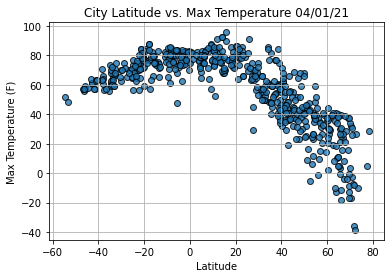

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

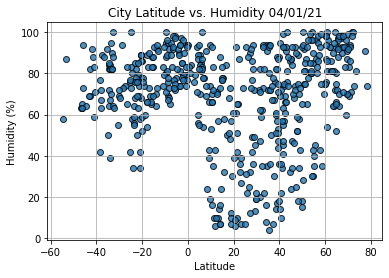

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

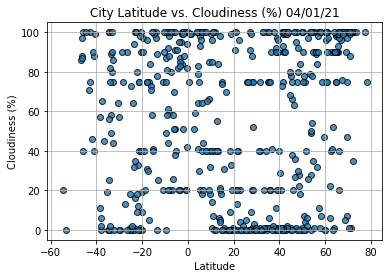

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

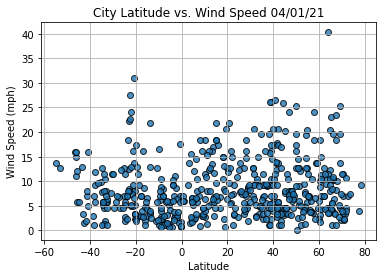

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = df.loc[(df["Lat"] >= 0)]
southern_hemi_df = df.loc[(df["Lat"] < 0)]

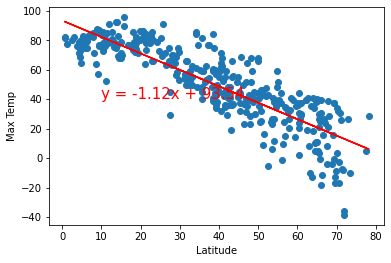

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


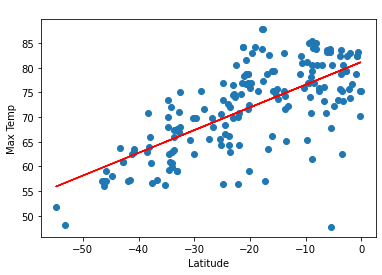

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

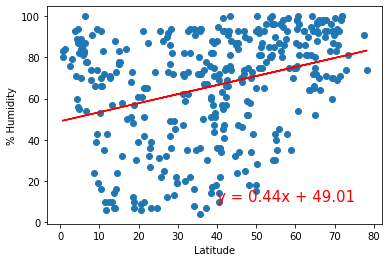

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

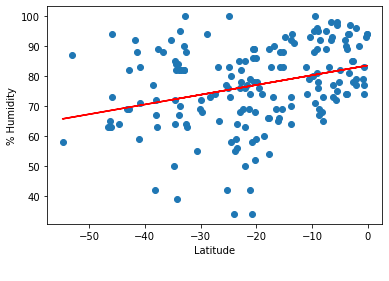

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

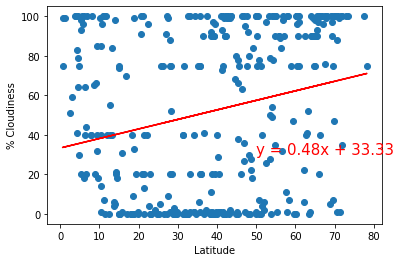

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50,30))

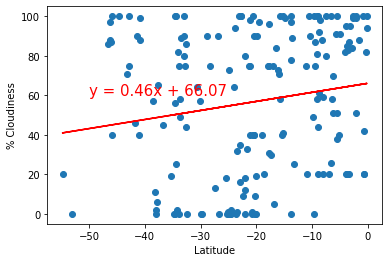

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

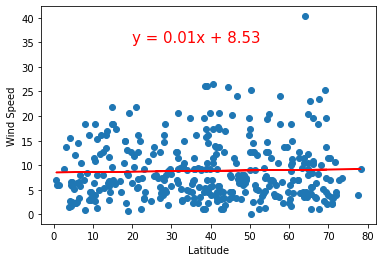

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,35))

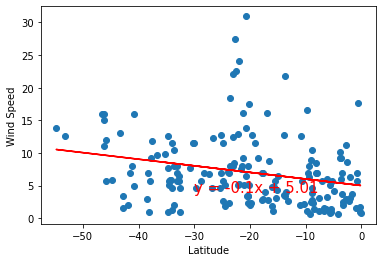

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,4))